In [46]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1

In [47]:
df_jan = pd.read_parquet("fhv_tripdata_2021-01.parquet")

In [48]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


# Q2

In [49]:
df_jan.pickup_datetime = pd.to_datetime(df_jan.pickup_datetime)
df_jan.dropOff_datetime = pd.to_datetime(df_jan.dropOff_datetime)

In [50]:
df_jan["duration"] = (df_jan.dropOff_datetime - df_jan.pickup_datetime).dt.total_seconds()/60

In [51]:
df_jan.duration.mean()

19.1672240937939

# Q3

C:\Users\Jaron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

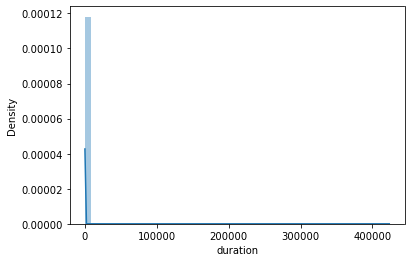

In [52]:
sns.distplot(df_jan.duration)

In [53]:
df_jan_2 = df_jan[df_jan.duration.between(1,60)]

In [54]:
df_jan_2.count()

dispatching_base_num      1109826
pickup_datetime           1109826
dropOff_datetime          1109826
PUlocationID               182818
DOlocationID               961919
SR_Flag                         0
Affiliated_base_number    1109053
duration                  1109826
dtype: int64

In [55]:
1154112 - 1109826

44286

In [56]:
df_jan_2.PUlocationID.fillna(-1, inplace=True)
df_jan_2.DOlocationID.fillna(-1, inplace=True)

C:\Users\Jaron\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
df_jan_2[df_jan_2.PUlocationID == -1].PUlocationID.count() / df_jan_2.PUlocationID.count() * 100

83.52732770722618

In [58]:
df_jan_2.PUlocationID.value_counts()

-1.0      927008
 221.0      8330
 206.0      6797
 129.0      5379
 115.0      4082
           ...  
 111.0         5
 27.0          4
 34.0          3
 2.0           2
 110.0         1
Name: PUlocationID, Length: 262, dtype: int64

# Q4

In [64]:
df_jan_2[["PUlocationID","DOlocationID"]] = df_jan_2[["PUlocationID","DOlocationID"]].astype(str)
train_dicts = df_jan_2[["PUlocationID","DOlocationID"]].to_dict(orient='records')

C:\Users\Jaron\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [68]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

y_train = df_jan_2['duration'].values

In [69]:
X_train.shape

(1109826, 525)

# Q5

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107206064

# Q6

In [42]:
df_feb = pd.read_parquet("fhv_tripdata_2021-02.parquet")

In [43]:
df_feb.pickup_datetime = pd.to_datetime(df_feb.pickup_datetime)
df_feb.dropOff_datetime = pd.to_datetime(df_feb.dropOff_datetime)
df_feb["duration"] = (df_feb.dropOff_datetime - df_feb.pickup_datetime).dt.total_seconds()/60

df_feb = df_feb[df_feb.duration.between(1,60)]

df_feb.PUlocationID.fillna(-1, inplace=True)
df_feb.DOlocationID.fillna(-1, inplace=True)

df_feb[["PUlocationID","DOlocationID"]] = df_feb[["PUlocationID","DOlocationID"]].astype(str)
test_dicts = df_feb[["PUlocationID","DOlocationID"]].to_dict(orient='records')

In [61]:
df_feb

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,None,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1.0,61.0,None,B00037,8.966667
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1.0,31.0,None,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1.0,169.0,None,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285,18.050000


In [70]:
X_test = dv.transform(test_dicts)
y_test = df_feb.duration.values

In [71]:
X_test.shape

(990113, 525)

In [72]:
y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

11.014283144804047